In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:


data = pd.read_csv("diabetes.csv")


print(data.head())
print(data.shape)
print(data.columns)


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
(768, 9)
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.drop(columns=['Pregnancies'], inplace=True)

[0 1 2 3 4 5 6]


([<matplotlib.axis.XTick at 0x29257cad390>,
 [Text(0, 0, 'Glucose'),
  Text(1, 0, 'BloodPressure'),
  Text(2, 0, 'SkinThickness'),
  Text(3, 0, 'Insulin'),
  Text(4, 0, 'BMI'),
  Text(5, 0, 'DiabetesPedigreeFunction'),
  Text(6, 0, 'Age')])

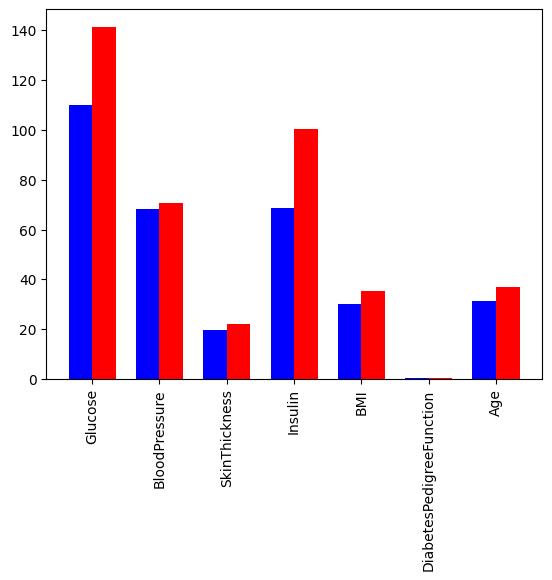

In [6]:
x = np.arange(len(data.columns)-1)  # Indices for the columns
width = 0.35
print(x)
plt.bar(x-width/2, data[data["Outcome"]==0].mean()[:-1:], width, color = 'blue')
plt.bar(x+width/2, data[data["Outcome"]==1].mean()[:-1:], width, color = 'red')
plt.xticks(x, data.columns[:-1:], rotation=90)
#print(data[data["Outcome"]==0])

In [7]:
# Replace values in the 'Glucose' column where Glucose <= 1 and Outcome == 0
data.loc[(data['Glucose'] == 0) & (data['Outcome'] == 0), 'Glucose'] = data.loc[data['Outcome'] == 0, 'Glucose'].mean()
data.loc[(data['Glucose'] == 0) & (data['Outcome'] == 1), 'Glucose'] = data.loc[data['Outcome'] == 1, 'Glucose'].mean()

data.loc[(data['BloodPressure'] == 0) & (data['Outcome'] == 0), 'BloodPressure'] = data.loc[data['Outcome'] == 0, 'BloodPressure'].mean()
data.loc[(data['BloodPressure'] == 0) & (data['Outcome'] == 1), 'BloodPressure'] = data.loc[data['Outcome'] == 1, 'BloodPressure'].mean()

data.loc[(data['Insulin'] == 0) & (data['Outcome'] == 0), 'Insulin'] = data.loc[data['Outcome'] == 0, 'Insulin'].mean()
data.loc[(data['Insulin'] == 0) & (data['Outcome'] == 1), 'Insulin'] = data.loc[data['Outcome'] == 1, 'Insulin'].mean()

data.loc[(data['BMI'] == 0) & (data['Outcome'] == 0), 'BMI'] = data.loc[data['Outcome'] == 0, 'BMI'].mean()
data.loc[(data['BMI'] == 0) & (data['Outcome'] == 1), 'BMI'] = data.loc[data['Outcome'] == 1, 'BMI'].mean()


C:\Users\rrpra\AppData\Local\Temp\ipykernel_22228\1441462518.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '109.98' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[(data['Glucose'] == 0) & (data['Outcome'] == 0), 'Glucose'] = data.loc[data['Outcome'] == 0, 'Glucose'].mean()
C:\Users\rrpra\AppData\Local\Temp\ipykernel_22228\1441462518.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '68.184' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[(data['BloodPressure'] == 0) & (data['Outcome'] == 0), 'BloodPressure'] = data.loc[data['Outcome'] == 0, 'BloodPressure'].mean()
C:\Users\rrpra\AppData\Local\Temp\ipykernel_22228\1441462518.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an erro

In [8]:
data.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.691999,72.267826,20.536458,118.967780,32.439222,0.471876,33.240885,0.348958
std,30.461151,12.115948,15.952218,93.557899,6.880449,0.331329,11.760232,0.476951
min,44.000000,24.000000,0.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,99.750000,64.000000,0.000000,68.792000,27.500000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,100.000000,32.050000,0.372500,29.000000,0.000000
75%,141.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
normalize_data = pd.DataFrame()
for name in data.columns[:-1:]:

        min_val = data[name].min()  # Minimum value of the column
        max_val = data[name].max()  # Maximum value of the column
        normalize_data[f'{name}_normalized'] = (data[name] - min_val) / (max_val - min_val)

target = data["Outcome"]


In [13]:
normalize_data.sample(10)

,Glucose_normalized,BloodPressure_normalized,SkinThickness_normalized,Insulin_normalized,BMI_normalized,DiabetesPedigreeFunction_normalized,Age_normalized
580,0.690323,0.673469,0.464646,0.103769,0.488753,0.125107,0.000000
577,0.477419,0.571429,0.000000,0.103769,0.505112,0.262596,0.000000
473,0.593548,0.673469,0.000000,0.065856,0.239264,0.056362,0.483333
703,0.548387,0.450857,0.000000,0.065856,0.415133,0.096499,0.333333
651,0.470968,0.367347,0.232323,0.110577,0.319018,0.165670,0.100000
8,0.987097,0.469388,0.454545,0.635817,0.251534,0.034159,0.533333
80,0.445161,0.204082,0.131313,0.065856,0.085890,0.026473,0.016667
645,0.729032,0.510204,0.353535,0.512019,0.433538,0.023911,0.150000
349,0.627468,0.571429,0.323232,0.103769,0.466258,0.114432,0.266667
494,0.232258,0.450857,0.000000,0.065856,0.247530,0.040991,0.016667


In [14]:
normalize_data.describe()

,Glucose_normalized,BloodPressure_normalized,SkinThickness_normalized,Insulin_normalized,BMI_normalized,DiabetesPedigreeFunction_normalized,Age_normalized
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.501239,0.492529,0.207439,0.126163,0.291191,0.168179,0.204015
std,0.196524,0.123632,0.161134,0.112449,0.140704,0.141473,0.196004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.359677,0.408163,0.000000,0.065856,0.190184,0.070773,0.050000
50%,0.470968,0.489796,0.232323,0.103365,0.283231,0.125747,0.133333
75%,0.625806,0.571429,0.323232,0.136118,0.376278,0.234095,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
X_train, X_test, y_train, y_test = train_test_split(normalize_data, target, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [37]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.15405440502489187
R-squared: 0.3559749216339969


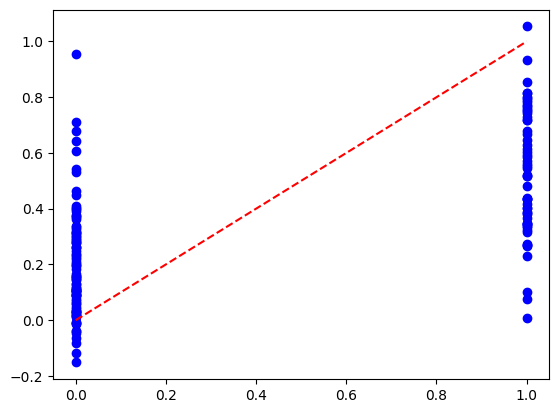

In [38]:
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
plt.show()

In [39]:
for i in range(len(y_pred)):
    y_pred[i] = y_pred[i] > 0.45
    #print(y_pred[i],y_test.iloc[i])
print(y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

[1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0.
 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Mean Squared Error: 0.22727272727272727
R-squared: 0.049885422175215965


for i in range(len(y_pred)):
    y_pred[i] = y_pred[i] > 
    #print(y_pred[i],y_test.iloc[i])
print(y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")